In [19]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [20]:
start = datetime(2012,1,1)
end = datetime(2016,12,30)

WMT = web.DataReader("WMT",'yahoo',start,end)

In [21]:
# ändere Frequenz
# WMT.tshift(periods=1,freq='A').head()
# WMT.shift(-1)

In [22]:
WMT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,61.060001,59.869999,59.970001,60.330002,12668800.0,48.089439
2012-01-04,60.349998,59.470001,60.209999,59.709999,9593300.0,47.595234
2012-01-05,59.619999,58.369999,59.349998,59.419998,12768200.0,47.364075
2012-01-06,59.450001,58.869999,59.419998,59.000000,8069400.0,47.029293
2012-01-09,59.549999,58.919998,59.029999,59.180000,6679300.0,47.172768


In [35]:
# Berechne 30 Tagesdurchschnitt
WMT['Close: 30 Day Mean'] = WMT['Close'].rolling(window=30).mean()


<AxesSubplot:xlabel='Date'>

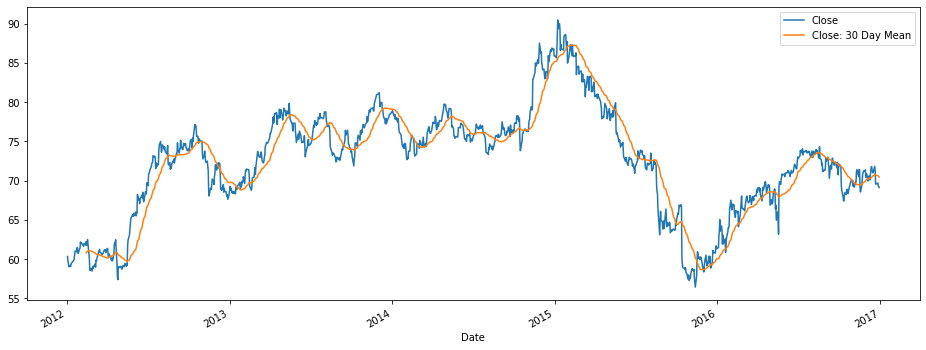

In [37]:
WMT[['Close', 'Close: 30 Day Mean']].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

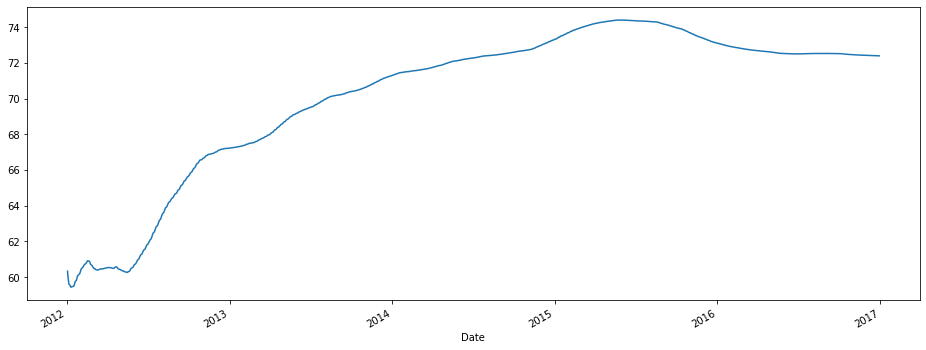

In [41]:
# Durchschnitt immer von den vorherigen Tagen
WMT['Close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

## Bollinger Bänder

<AxesSubplot:xlabel='Date'>

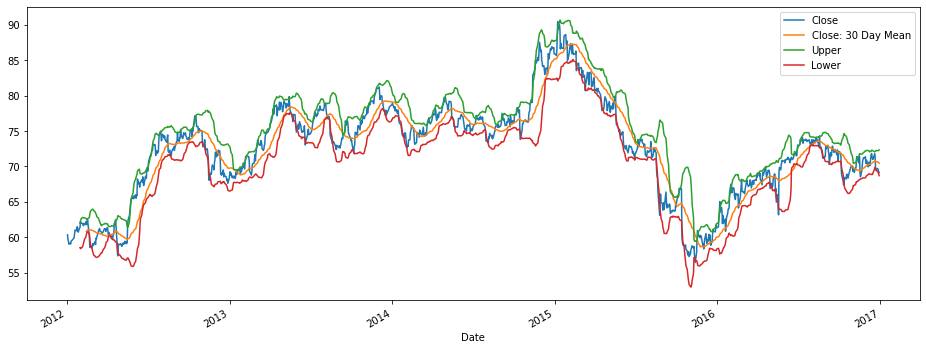

In [42]:
# Close 20 Ma
WMT['Close 30 Day Mean'] = WMT['Close'].rolling(window=20).mean()

# Upper  = 20 MA + 2*std(20)
WMT['Upper'] = WMT['Close 30 Day Mean'] + 2 * WMT['Close'].rolling(window=20).std()
# Lower = 20MA - 2*std(20)
WMT['Lower'] = WMT['Close 30 Day Mean'] - 2 * WMT['Close'].rolling(window=20).std()

# Close
WMT[['Close', 'Close: 30 Day Mean', 'Upper', 'Lower']].plot(figsize=(16,6))